##### Note: This has been run on `diva` machine

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("~/projects/ViDA-SSL/")

In [26]:
from os.path import join
from glob import glob
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
from torchvision.io import read_video_timestamps

from utils.io import load_json, load_txt

In [5]:
DATA_DIR = "/ssd/fmthoker/ntu/"

In [6]:
train_split_path = join(DATA_DIR, "ntu_60_annotations/ntu_60_cross_subject_TrainTestlist/trainlist01.txt")
test_split_path = join(DATA_DIR, "ntu_60_annotations/ntu_60_cross_subject_TrainTestlist/testlist01.txt")

In [12]:
train_split = load_txt(train_split_path)
test_split = load_txt(test_split_path)

combined = train_split + test_split

In [13]:
len(train_split), len(test_split), len(combined)

(40320, 16560, 56880)

In [9]:
train_split[0]

'touch_back__backache_/S017C003P017R001A046_rgb.avi '

In [11]:
original_videos_dir = join(DATA_DIR, "original_videos")

In [14]:
combined[0]

'touch_back__backache_/S017C003P017R001A046_rgb.avi '

In [23]:
durations = []

for v in tqdm(combined, desc="Extracting video durations"):
    video_path = join(original_videos_dir, v.split()[0])
    frame_ids, fps = read_video_timestamps(video_path)
    duration = len(frame_ids) / fps
    durations.append(duration)

Extracting video durations: 100%|████████████████████████████████████████████████████████████████████████████████████| 56880/56880 [06:00<00:00, 157.64it/s]


In [24]:
np.mean(durations)

2.8170511017346467

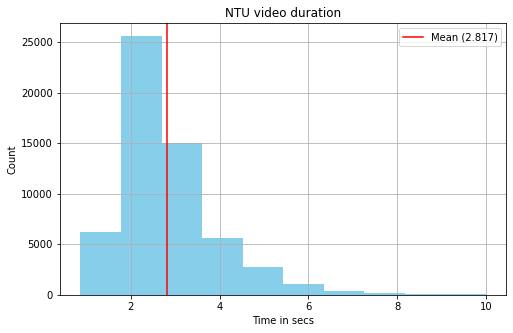

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.hist(durations, color="skyblue")
ax.grid()
ax.set_title("NTU video duration")
ax.set_xlabel("Time in secs")
ax.set_ylabel("Count")
ax.axvline(x=np.mean(durations), color="red", label=f"Mean ({np.mean(durations):.3f})")
ax.legend()

plt.show()